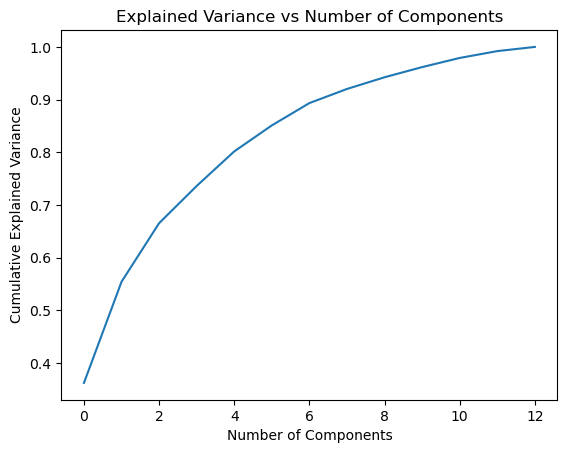

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the Wine dataset
wine = load_wine()
data = pd.DataFrame(data=wine.data, columns=wine.feature_names)
target = pd.DataFrame(data=wine.target, columns=['target'])

# Split the dataset into features and target variables
X = data
y = target['target']

# Data preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Implement PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Determine the optimal number of principal components
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

# Find the number of components that explain 95% of the variance
n_components = (cumulative_variance <= 0.95).sum() + 1

# Visualize explained variance
plt.plot(cumulative_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs Number of Components')
plt.show()

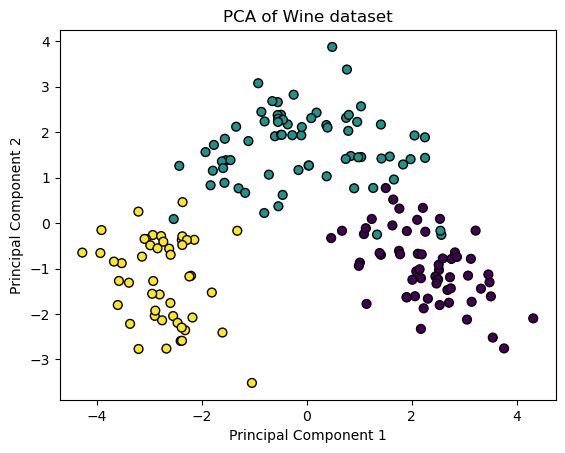

In [2]:
# Retrain PCA with the optimal number of components
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

# Visualize results of PCA using a scatter plot
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=40)
plt.title('PCA of Wine dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()



/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


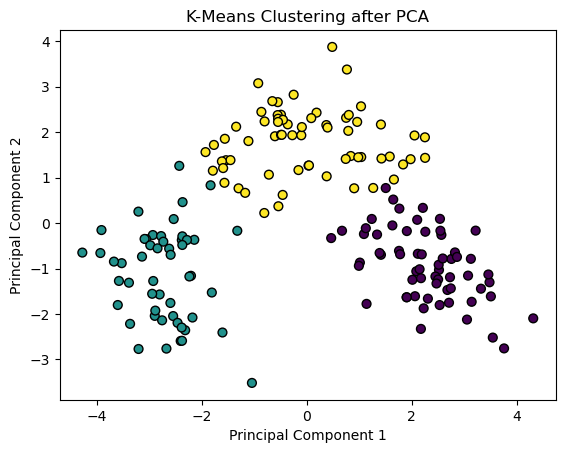

In [3]:
# Perform clustering using K-Means
kmeans = KMeans(n_clusters=len(wine.target_names), random_state=42)
clusters = kmeans.fit_predict(X_pca)

# Visualize clustering results
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', edgecolor='k', s=40)
plt.title('K-Means Clustering after PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()